# Вспомогательные функции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [2]:
import numpy as np

def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    return X_assess, parameters

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters

def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    return X_assess, Y_assess

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

# Плоская классификация данных с одним скрытым слоем

В этой лабораторной требуется построить свою нейросеть с одним скрытым слоем и оценить разницу между этой моделью и той, которая была реализована в прошлой работе.

**Вы узнаете как:**
- Реализовать нейронную сеть с одним скрытым слоем для бинарной классификации.
- Использовать различные нелинейные функции активации, например tanh
- Вычислять перекрестную энтропии (cross entropy loss)
- Реализовать прямое и обратное распространение

## 1 - Импорт ##

Сначала импортируем все пакеты, которые вам понадобятся во время этого задания.

In [7]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # задано значение seed, чтобы результаты были воспроизводимы

## 2 - Работа с датасетом ##

Во-первых, давайте получим набор данных, с которым будем работать. Следующий код загрузит набор данных в переменные `X` и `Y`.

In [11]:
X, Y = load_planar_dataset()

Визуализируйте набор данных с помощью matplotlib. Данные выглядят как «цветок» с красными (метка y=0) и синими (y=1) точками. Цель — построить модель, различающую эти классы.

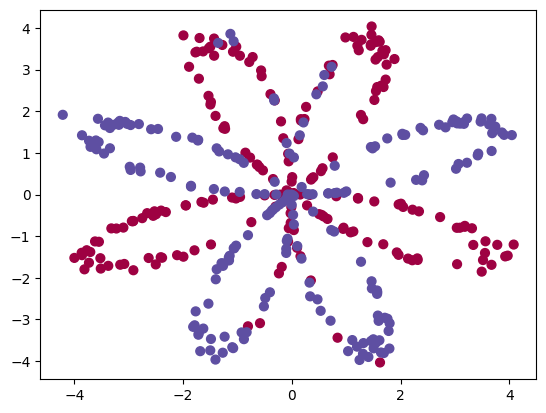

In [14]:
# Визуализируем данные:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Имеется:
- numpy-array (матрица) X, содержащая ваши функции (x1, x2)
- numpy-array (вектор) Y, содержащий ваши метки (красный: 0, синий: 1).

Давайте сначала поймем, что представляют собой наши данные.

**Упражнение**. Сколько обучающих примеров у вас есть? Какова размерность переменных «X» и «Y»?

**Подсказка**: как получить размерность numpy-array? [(документация)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [16]:
### Начало кода ### (≈ 3 строки)
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # размер обучающей выборки
### конец кода ###

print ('Размерность X: ' + str(shape_X))
print ('Размерность Y: ' + str(shape_Y))
print ('Всего m = %d тренировочных примеров!' % (m))

Размерность X: (2, 400)
Размерность Y: (1, 400)
Всего m = 400 тренировочных примеров!


**Ожидаемый результат**:
       
<table style="width:40%">
  
  <tr>
    <td> **размерность X** </td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**размерность Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
   <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Логистическая регрессия

Прежде чем строить полную нейронную сеть, давайте сначала посмотрим, как логистическая регрессия справляется с этой задачей. Для этого вы можете использовать встроенные функции sklearn. Запустите приведенный ниже код, чтобы обучить классификатор логистической регрессии на наборе данных.

In [17]:
# Обучаем классификатор логистической регрессии
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

c:\Users\zavid\Python3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Теперь вы можете построить график с отображением того, как модель делит данные на классы. Запустите код ниже.

C:\Users\zavid\AppData\Local\Temp\ipykernel_25132\2597533229.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Точность логистической регрессии: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


Точность логистической регрессии: 47 % (процент правильно размеченных точек данных)


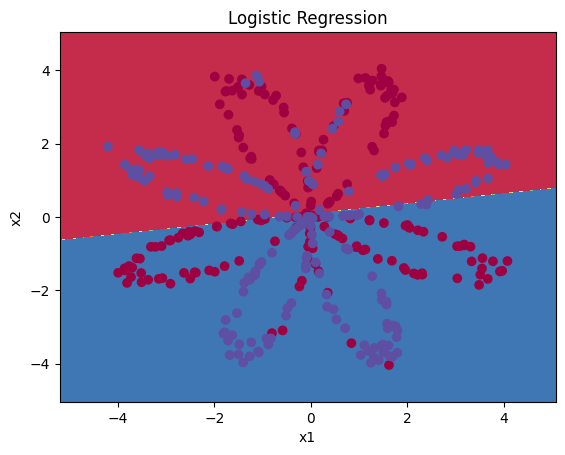

In [31]:
# строим график
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Выводим accuracy
LR_predictions = clf.predict(X.T)
print ('Точность логистической регрессии: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(процент правильно размеченных точек данных)")

**Ожидаемый результат**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>


**Интерпретация**: Набор данных не является линейно разделимым, поэтому логистическая регрессия работает не очень хорошо. Понадеемся, что нейронная сеть справится лучше.

## 4 - Нейросетевая модель

Логистическая регрессия не справилась с данным датасетом. Обучим нейронную сеть с одним скрытым слоем.

**Вот наша модель**:
<img src="classification_kiank.png" style="width:600px;height:300px;">

**Мат.обоснование**:

Для одного элемента $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Учитывая предсказания для всех элементов, вы также можете вычислить стоимость $J$ следующим образом:: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Напоминание**: Общая методология построения нейронной сети заключается в следующем:
 1. Опредяеем структуру нейронной сети (количество входных блоков, количество скрытых блоков и т. д.). 
 2. Инициализируем параметры модели
 3. В цикле:
        - Реализуем прямое распространение
        - Считаем потери
        - Реализуем обратное распространение, чтобы получить градиенты
        - Обновляем параметры (градиентный спуск)

Для вычисления шагов 1-3 можно создать вспомогательные функции, а затем объединить их в одну функцию, которую мы называем nn_model(). После построения `nn_model()` и подбора правильных параметров, можно делать прогнозы на основе новых данных.

### 4.1 - Определяем структуру нейросети ####

**Задание**: Инициализируйте три переменные:
- n_x: размер входного слоя
- n_h: размер скрытого слоя (задайте 4) 
- n_y: размер выходного слоя

**Подсказка**: Используйте размерность X и Y, чтобы найти n_x и n_y. Кроме того, захардкодьте размер скрытого слоя равным 4.

In [37]:
def layer_sizes(X, Y):
    """
    Аргументы:
    X -- входной датасет размерностью (input size, количество элементов)
    Y -- labels размерностью (output size, количество элементов)
    
    Возвращает:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    """
    ### Начало кода ### (≈ 3 строчки)
    n_x = X.shape[0] # размер входного слоя
    n_h = 4
    n_y = Y.shape[0] # размер выходного слоя
    ### Конец кода
    return (n_x, n_h, n_y)

In [42]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Размер входного слоя: n_x = " + str(n_x))
print("Размер скрытого слоя: n_h = " + str(n_h))
print("Размер выходного слоя: n_y = " + str(n_y))

Размер входного слоя: n_x = 5
Размер скрытого слоя: n_h = 4
Размер выходного слоя: n_y = 2


**Ожидаемый результат** (это не те размеры, которые вы будете использовать для своей сети, они используются просто для оценки функции, которую вы только что закодили)

<table style="width:20%">
    
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
   <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
   <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

In [43]:
Y_assess.shape

(2, 3)

### 4.2 -Иницилиазируем параметры модели ####

**Задание**: Реализовать функцию `initialize_parameters()`.

**Инструкции**:
- Убедитесь, что размерности параметров верны. При необходимости обратитесь к рисунку нейронной сети выше.
- Инициализируйте матрицы весов случайными значениями.
     - Используйте: `np.random.randn(a,b) * 0,01` для случайной инициализации матрицы формы (a,b).
- Инициализируйте свободные члены (bias vectors) нулями.
     - Используйте: `np.zeros((a,b))` для инициализации матрицы формы (a,b) нулями.

In [46]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Аргументы:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    
    Возвращает:
    params -- словарь, содержащий ваши параметры:
                    W1 -- матрицу весов размерностью (n_h, n_x)
                    b1 -- свободные члены (bias vector) размерностью (n_h, 1)
                    W2 -- матрицу весов размерностью (n_y, n_h)
                    b2 -- свободные члены (bias vector) размерностью (n_y, 1)
    """
    
    np.random.seed(2) # мы настраиваем начальное число так, чтобы ваш результат соответствовал нашему, хотя инициализация является случайной.
    
    ### Начало кода ### (≈ 4 строчки)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### Конец кода ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [50]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Ожидаемый результат**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



### 4.3 - Цикл ####

**Задание**: Реализуйте `forward_propagation()`.

**Инструкции**:
- Посмотрите выше на математическое представление модели.
- Вы можете использовать функцию `sigmoid()`. Она описана во вспомогательных функциях.
- Вы можете использовать функцию `np.tanh()`. Это часть библиотеки numpy.
- Шаги, которые необходимо реализовать:
    1. Получение каждого параметра из словаря "parameters" (который является результатом `initialize_parameters()`), используя `parameters[..]`.
    2. Реализовать прямое распространение. Вычислите $Z^{[1]}, A^{[1]}, Z^{[2]}$ и $A^{[2]}$ .
- Значения, необходимые для обратного распространения ошибки, хранятся в "`cache`".  `cache` будет передан в качестве входных данных для функции обратного распространения ошибки.

In [53]:
# функция forward_propagation

def forward_propagation(X, parameters):
    """
    Аргументы:
    X -- входные данные размерностью (n_x, m)
    parameters -- словарь, содержащий ваши параметры (результат функции инициализации)
    
    Возвращает:
    A2 -- Выход второго слоя
    cache -- словарь содержащий "Z1", "A1", "Z2" и "A2"
    """
    # Получить каждый параметр из словаря parameters
    ### Начало кода ### (≈ 4 строчки)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### Конец кода ###
    
    # Реализуйте прямое распространение, чтобы вычислить A2 (вероятности)
    ### Начало кода ### (≈ 4 строчки)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### Конец кода ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [57]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Примечание. Здесь мы используем среднее значение, чтобы убедиться, что результат соответствует ожидаемому. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


**Ожидаемый результат**:
<table style="width:55%">
  <tr>
    <td> -0.000499755777742 -0.000496963353232 0.000438187450959 0.500109546852 </td> 
  </tr>
</table>

Теперь, когда мы вычислили $A^{[2]}$ (в нашем случае переменную "`A2`"), которая содержит $a^{[2](i)}$ для каждого элемента, можно вычислить функцию стоимости, как показано ниже:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Задание**: Реализовать `compute_cost()`, чтобы вычислить значение функции стоимости $J$.

**Инструкции**:
- Существует много способов рассчитать перекрестную энтропию (cross-entropy loss). Например, так:
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # нет необходимости в цикле for!
```

(можно использовать или `np.multiply()` и затем `np.sum()`, или сразу `np.dot()`).


In [60]:
def compute_cost(A2, Y, parameters):
    """
    Вычисляет суммарную перекрестную энтропию (cross-entropy cost), заданную в уравнении (13)
    
    Аргументы:
    A2 -- Выход второго слоя, размерностью (1, количество элементов)
    Y -- "true" labels вектор размерностью (1, количество экземпляров)
    parameters -- словарь, содержащий параметры W1, b1, W2 и b2
    
    Возвращает:
    cost -- cross-entropy cost, данная в уравнении (13)
    """
    
    m = Y.shape[1] # количество элементов

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m

    cost = np.squeeze(cost)     # гарантирует, что стоимость соответствует ожидаемому размеру. 
                                # Например, превращает [[17]] в 17. 
    assert(isinstance(cost, float))
    
    return cost

In [69]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


**Ожидаемый результат**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.692919893776 </td> 
  </tr>
  
</table>

Используя `cache`, вычисленный во время прямого распространения, теперь можно реализовать обратное распространение.

**Задание**: реализовать функцию `backward_propagation()`.

**Инструкции**:
Обратное распространение ошибки обычно является самой сложной (наиболее математической) частью глубокого обучения. В помощь слайд из лекции Эндрю Ына. Необходимо использовать шесть уравнений в правой части этого слайда, поскольку мы создаем векторизованную реализацию.  

<img src="grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Заметьте, что  $*$ обозначает поэлементное умножение.
- Обозначения, которые вы будете использовать, распространены в кодировании глубокого обучения:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Совет:
    - Чтобы посчитать dZ1 вам необходимо будет вычислить $g^{[1]'}(Z^{[1]})$. Т.к. $g^{[1]}(.)$ это функция активации tanh, если $a = g^{[1]}(z)$ тогда $g^{[1]'}(z) = 1-a^2$. Поэтому можно вычислить $g^{[1]'}(Z^{[1]})$ используя `(1 - np.power(A1, 2))`.

In [77]:
def backward_propagation(parameters, cache, X, Y):
    """
    Реализует обратное распространение, используя инструкции выше.
    
    Аргументы:
    parameters -- словарь, содержащий наши параметры 
    cache -- словарь содержащий "Z1", "A1", "Z2" и "A2".
    X -- входные данные размерностью (2, количество элементов)
    Y -- "true" labels vector размерностью (1, количество элементов)
    
    Возвращает:
    grads -- словарь, содержащий ваши градиенты с оглядкой на разные параметры
    """
    m = X.shape[1]
    
    # Сначала извлеките W1 и W2 из словаря parameters.
    ### начало кода ### (≈ 2 строчки)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### конец кода ###
        
    # Извлеките A1 и A2 из словаря cache.
    ### начало кода ### (≈ 2 строчки)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### конец кода ###
    
    # Обратное распространение: вычислите dW1, db1, dW2, db2. 
    ### начало кода ### (≈ 6 строчек, в соответствии с 6 уравнениями на картинке сверху)
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    ### конец кода ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [84]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(X_assess.shape)
print(Y_assess.shape)

(4, 2)
(1, 4)
(2, 3)
(1, 3)


In [90]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


**Ожидаемый результат**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00363613  0.03153604  0.01162914 -0.01318316]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[ 0.06589489]] </td> 
  </tr>
  
</table>  

**Задача**: Реализовать правило обновления с использованием градиентного спуска. Необходимо использовать (dW1, db1, dW2, db2) для обновления (W1, b1, W2, b2).

**Общее правило градиентного спуска**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ где $\alpha$ — это скорость обучения, а $\theta$ представляет собой параметр.

**Иллюстрация**: Алгоритм градиентного спуска с хорошей скоростью обучения (схождение) и плохой скоростью обучения (расхождение).

<img src="sgd.gif" style="width:400;height:400;"> <img src="sgd_bad.gif" style="width:400;height:400;">



In [95]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Обновляет параметры, используя правило обновления градиентного спуска, указанное выше.
    
    Аргументы:
    parameters -- словарь, содержащий параметры 
    grads -- словарь, содержащий градиенты 
    
    Возвращает:
    parameters -- словарь, содержащий обновленные параметры 
    """
    # Получите каждый параметр из словаря parameters.
    ### начало кода ### (≈ 4 строчки)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### конец кода ###
    
    # Получите каждый градиент из словаря grads.
    ### начало кода ### (≈ 4 строчки)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## конец кода ###
    
    # Обновите значения для каждого параментра
    ### начало кода ### (≈ 4 строчки)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    ### конец кода ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [99]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Ожидаемый результат**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

### 4.4 - Объедините части 4.1, 4.2 и 4.3 в nn_model() ####

**Задача**: Построить нейросеть в функции `nn_model()`.

**Instructions**: Модель нейронной сети должна использовать предыдущие функции в правильном порядке.

In [102]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Аргументы:
    X -- датасет размерностью (2, количество элементов)
    Y -- labels размерностью (1, количество элементов)
    n_h -- размер скрытого слоя
    num_iterations -- количество итераций в цикле градиентого спуска
    print_cost -- если True, выводит cost каждые 1000 итераций
    
    Возвращает:
    parameters -- параметры, изученные моделью. Затем их можно использовать для прогнозирования.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Инициализируйте параметры, затем извлеките W1, b1, W2, b2. Входные данные: «n_x, n_h, n_y». Выходы = «W1, b1, W2, b2, параметры».
    ### начало кода ### (≈ 5 строчек)
    n_x, n_h, n_y =  layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### конец кода ###
    
    # Цикл (градиентный спуск)

    for i in range(0, num_iterations):
         
        ### начало кода ### (≈ 4 строчки)
        # Прямое распространение. Входные параметры: "X, parameters". Выходные параметры: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Функция стоимости. Входные параметры: "A2, Y, parameters". Выходные параметры: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Обратное распространение. Входные параметры: "parameters, cache, X, Y". Выходные параметры: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Обновление параметра градиентного спуска. Входные параметры: "parameters, grads". Выходные параметры: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### конец кода ###
        
        # Выводит cost каждые 1000 итераций
        if print_cost and i % 1000 == 0:
            print ("Стоимость после итераций %i: %f" %(i, cost))

    return parameters

In [103]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\zavid\AppData\Local\Temp\ipykernel_25132\1672171803.py:18: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
C:\Users\zavid\AppData\Local\Temp\ipykernel_25132\756290347.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18498039  5.33206075]
 [-7.53803927  1.20755737]
 [-4.19300052  5.32616415]
 [ 7.53798257 -1.20758979]]
b1 = [[ 2.32932856]
 [ 3.81001663]
 [ 2.33008743]
 [-3.81011531]]
W2 = [[-6033.8235681  -6008.1429641  -6033.08779993  6008.07953121]]
b2 = [[-52.67923108]]


**Ожидаемый результат**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-4.18494056  5.33220609]
 [-7.52989382  1.24306181]
 [-4.1929459   5.32632331]
 [ 7.52983719 -1.24309422]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 2.32926819]
 [ 3.79458998]
 [ 2.33002577]
 [-3.79468846]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-6033.83672146 -6008.12980822 -6033.10095287  6008.06637269]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[-52.66607724]] </td> 
  </tr>
  
</table>  

### 4.5 Предсказания

**Задача**: Используйте модель для прогнозирования, для этого напишите функцию predict().
Используйте прямое распространение для прогнозирования результатов.

**Напоминание**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
Например, если вы хотите установить элементы матрицы X на 0 и 1 на основе порогового значения, вы должны сделать: ```X_new = (X > threshold)```

In [107]:
def predict(parameters, X):
    """
    Используя изученные параметры, прогнозирует класс для каждого примера в X
    
    Аргументы:
    parameters -- словарь, содержащий ваши параметры 
    X -- входные данные размера (n_x, m)
    
    Возвращает:
    predictions -- Вектор предсказаний нашей модели (red: 0 / blue: 1)
    """
    
    # Вычисляет вероятности, используя прямое распространение, и классифицирует их как 0/1, используя 0,5 в качестве порога.
    ### начало кода ### (≈ 2 строчки)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    ### конец кода ###
    
    return predictions

In [111]:
a = np.array([[0,2,1,3,5,7,6,5]])
b = np.array([1  if x>3 else 0  for x  in a.reshape(-1,1)])
b = b.reshape(a.shape)
b

array([[0, 0, 0, 0, 1, 1, 1, 1]])

In [114]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("Среднее предсказаний = " + str(np.mean(predictions)))

Среднее предсказаний = 0.6666666666666666


**Ожидаемый результат**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

Пришло время запустить модель и посмотреть, как она работает на плоском наборе данных. Запустите следующий код, чтобы протестировать свою модель с одним скрытым слоем из $n_h$ скрытых модулей.

Стоимость после итераций 0: 0.693048
Стоимость после итераций 1000: 0.288083
Стоимость после итераций 2000: 0.254385
Стоимость после итераций 3000: 0.233864
Стоимость после итераций 4000: 0.226792
Стоимость после итераций 5000: 0.222644
Стоимость после итераций 6000: 0.219731
Стоимость после итераций 7000: 0.217504
Стоимость после итераций 8000: 0.219508
Стоимость после итераций 9000: 0.218622


Text(0.5, 1.0, 'Граница решения для скрытого слоя размера4')

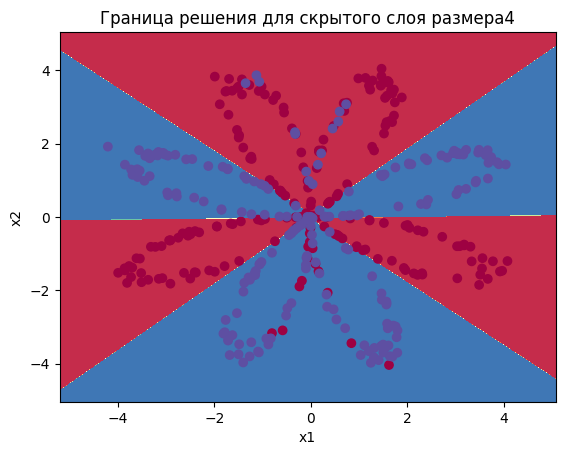

In [116]:
# Создайте модель с n_h-мерным скрытым слоем.
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

# Строим график
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Граница решения для скрытого слоя размера" + str(4))

**Ожидаемый результат (округленный до трех знаков)**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218 </td> 
  </tr>
  
</table>


In [119]:
# Выводим accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


C:\Users\zavid\AppData\Local\Temp\ipykernel_25132\934120396.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


**Ожидаемый результат**: 

<table style="width:30%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Точность действительно высока по сравнению с логистической регрессией. Модель выучила узор! Нейронные сети способны изучать даже сильно нелинейные границы разделения классов, в отличие от логистической регрессии.

Теперь давайте попробуем несколько размеров скрытого слоя.

### 4.6 - Настройка размера скрытого слоя (необязательное/неоцениваемое упражнение) ###

Запустите следующий код. Это может занять 1-2 минуты. Вы увидите различное поведение модели для разных размеров скрытых слоев.

C:\Users\zavid\AppData\Local\Temp\ipykernel_25132\2438115858.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)


Точность для 1 скрытых нейронов: 90.5 %
Точность для 2 скрытых нейронов: 90.5 %
Точность для 3 скрытых нейронов: 90.5 %
Точность для 4 скрытых нейронов: 90.5 %
Точность для 5 скрытых нейронов: 90.5 %
Точность для 20 скрытых нейронов: 90.5 %
Точность для 50 скрытых нейронов: 90.5 %


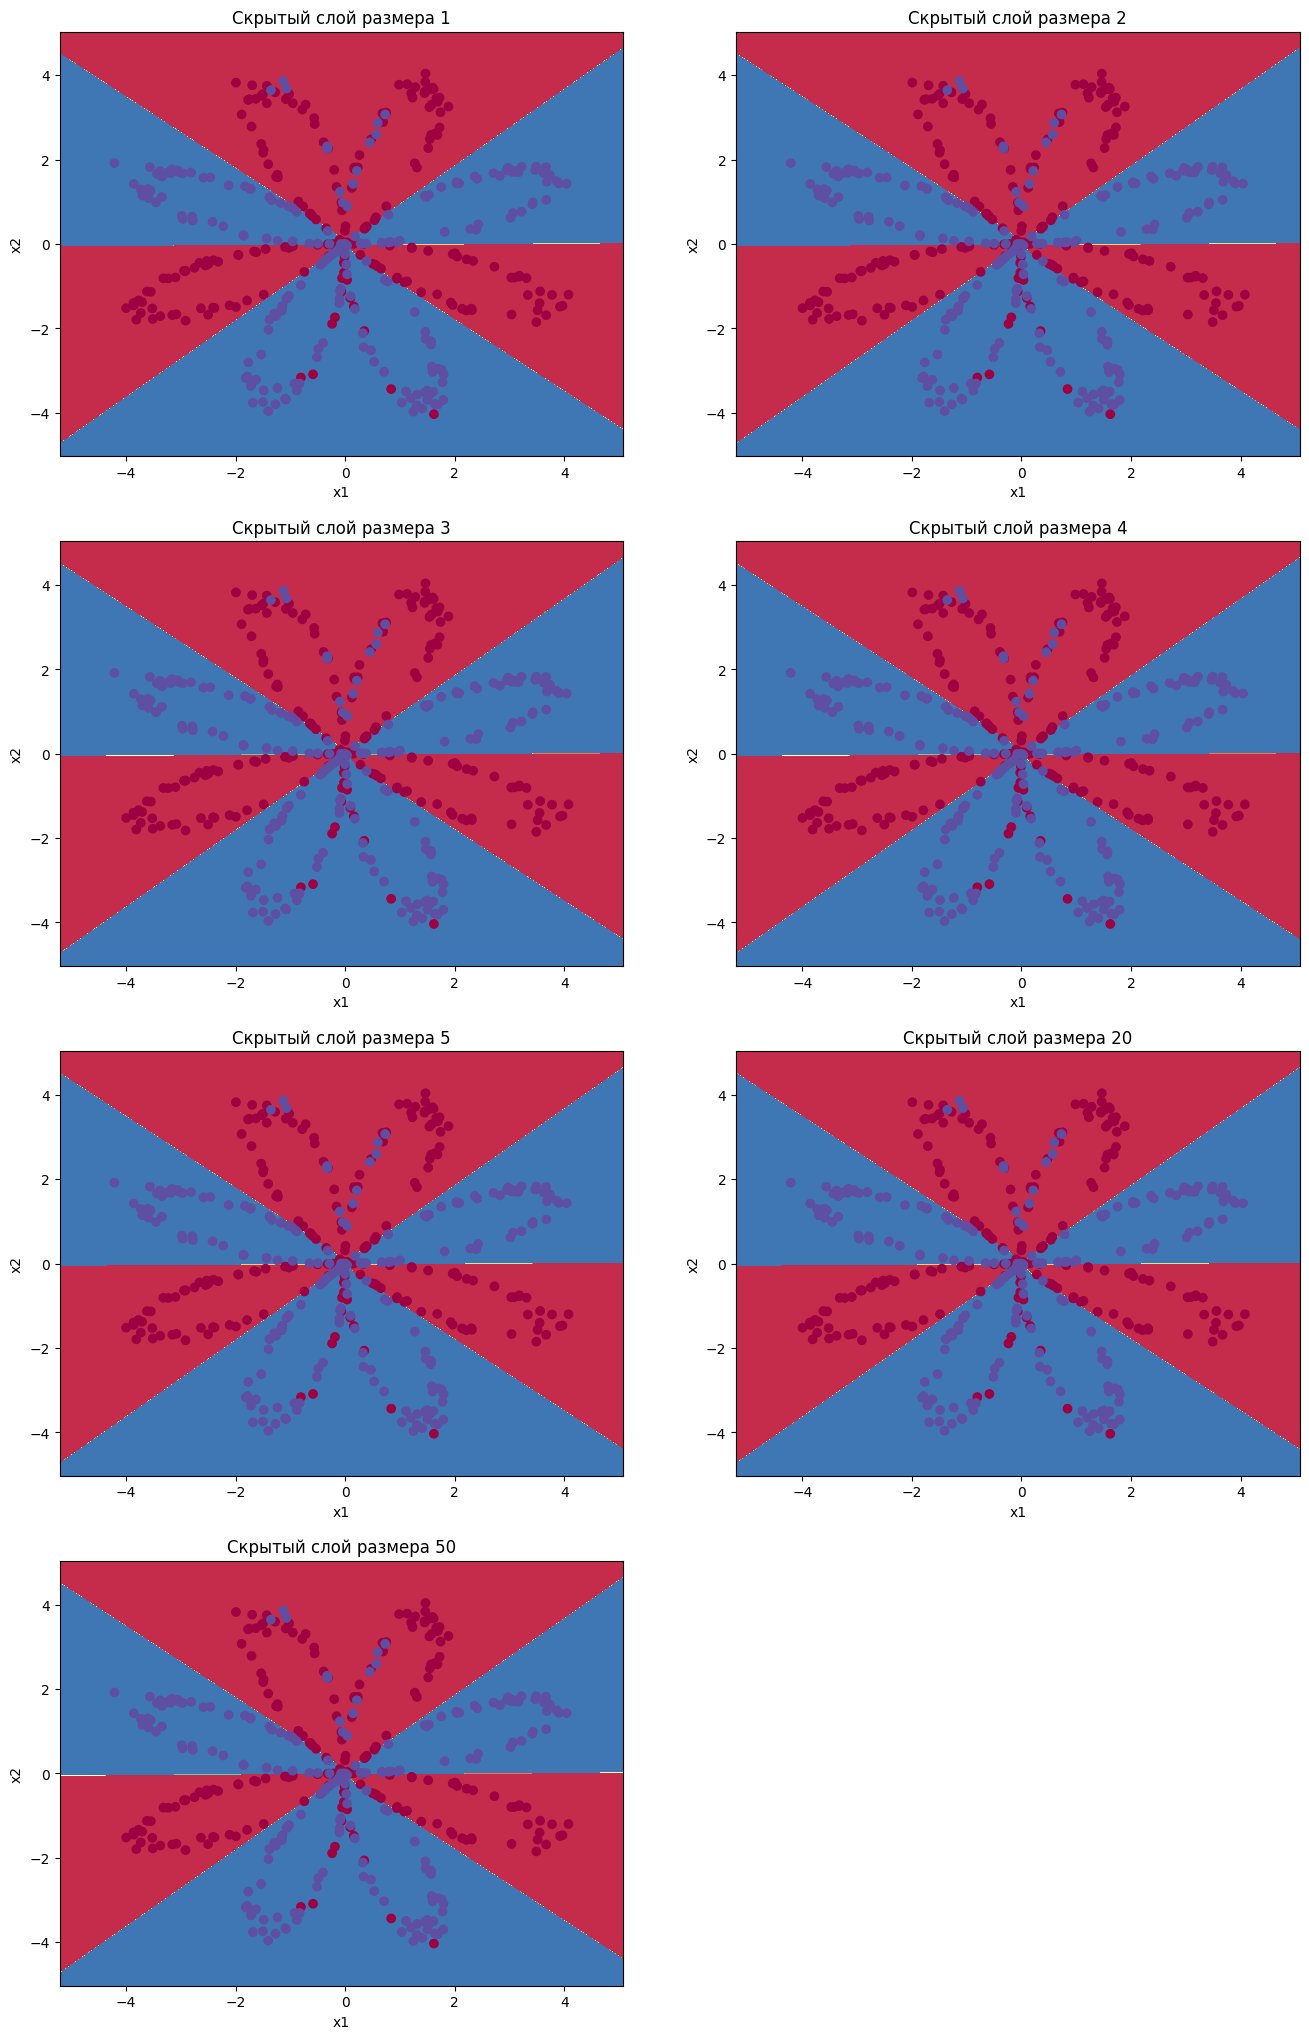

In [120]:
# Это может занять около 2 минут.

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Скрытый слой размера %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T)) / float(Y.size) * 100)
    print ("Точность для {} скрытых нейронов: {} %".format(n_h, accuracy))

**Интерпретация**:
- Более крупные модели (с большим количеством скрытых нейронов) могут лучше соответствовать обучающей выборке, пока в конечном итоге самые большие модели не переобучатся под исходные данные.
- Лучший размер скрытого слоя, по-видимому, составляет около n_h = 5. Действительно, значение близкое к этому, похоже, хорошо соответствует данным, не вызывая при этом заметного переобучения.
- Позже вы также узнаете о регуляризации, которая позволяет использовать очень большие модели (например, n_h = 50) без особого переобучения.